In [32]:
import pandas as pd
df=pd.read_csv("C:/Users/campus4D038/Desktop/프로젝트 1/Merge_2.csv")
df['거래일자'] = pd.to_datetime(df['거래일자']) # int -> datetime
df['거래취소여부'] = df['거래취소여부'].astype('int64') # float64 -> int64
df['판매금액'] = df['판매금액'].astype('int64') #float64 -> int64
df['서비스가격'] = df['서비스가격'].astype('int64') #float64 -> int64
df['이용자수'] = df['이용자수'].astype('int64') #float64 -> int64
df['서비스번호'] = df['서비스번호'].astype('int64') #float64 -> int64
df['총금액'] = df['총금액'].astype('int64') #float64 -> int64
df['매출'] = df['매출'].astype('int64') #float64 -> int64
df['연령'] = df['연령'].astype('int64') #float64 -> int64
df['총구매금액'] = df['총구매금액'].astype('int64') #float64 -> int64
df['총 판매 금액'] = df['총 판매 금액'].astype('int64') #float64 -> int64

In [35]:
df1=df.copy()
# 새로운 컬럼 '추가결제금액발생여부' 생성
df1['추가결제금액발생여부'] = df1['추가결제금액'].apply(lambda x: 0 if x == 0 else 1)
df1['추가결제금액발생여부'] = df1['추가결제금액발생여부'].astype('category')
df1['추가결제금액발생여부'].unique()

[1, 0]
Categories (2, int64): [0, 1]

In [36]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
plt.rcParams['axes.unicode_minus'] = False  # 마이너스 깨짐 방지

In [15]:
# 2-1 ②. 대분류 O 가격에 따라 (서비스 카테고리별)거래 성사율에 차이

# 대분류 별 그룹화 => 거래성사율, 판매금액, 총금액, 매출의 평균 구하기
df_grouped = df1.groupby('대분류').agg(
    거래취소율=('거래취소여부', lambda x: (x == 1).mean() * 100),
    판매금액=('판매금액', 'median'),
    서비스가격=('서비스가격', 'median'),
    추가결제금액=('추가결제금액', 'median'),
    총금액=('총금액', 'median'),
    매출=('매출', 'median')
).reset_index()

df_grouped['판매금액'] = df_grouped['판매금액'].round()
df_grouped['서비스가격'] = df_grouped['서비스가격'].round()
df_grouped['추가결제금액'] = df_grouped['추가결제금액'].round()
df_grouped['총금액'] = df_grouped['총금액'].round()
df_grouped['매출'] = df_grouped['매출'].round()

df_grouped['판매금액'] = df_grouped['판매금액'].astype(int)
df_grouped['서비스가격'] = df_grouped['서비스가격'].astype(int)
df_grouped['추가결제금액'] = df_grouped['추가결제금액'].astype(int)
df_grouped['총금액'] = df_grouped['총금액'].astype(int)
df_grouped['매출'] = df_grouped['매출'].astype(int)
df_grouped

,대분류,거래취소율,판매금액,서비스가격,추가결제금액,총금액,매출
0,UnReal,2.589928,56500,55000,0,58000,412500
1,게임,1.045179,11150,5000,0,13800,97500
2,기타,1.679382,20000,11000,1,25000,162500
3,기획,2.160333,49000,49000,1,49000,318500
4,데이터,2.187246,20000,20000,0,25000,175500
5,디자인,4.315333,33000,33000,1,36000,259600
6,모바일,2.129980,51400,50000,0,53800,391500
7,인공지능,2.894356,99000,99000,0,99000,643500
8,커머스,1.822088,10000,5000,0,13000,90000
9,프로그래밍,2.218745,28100,20000,0,30000,215800


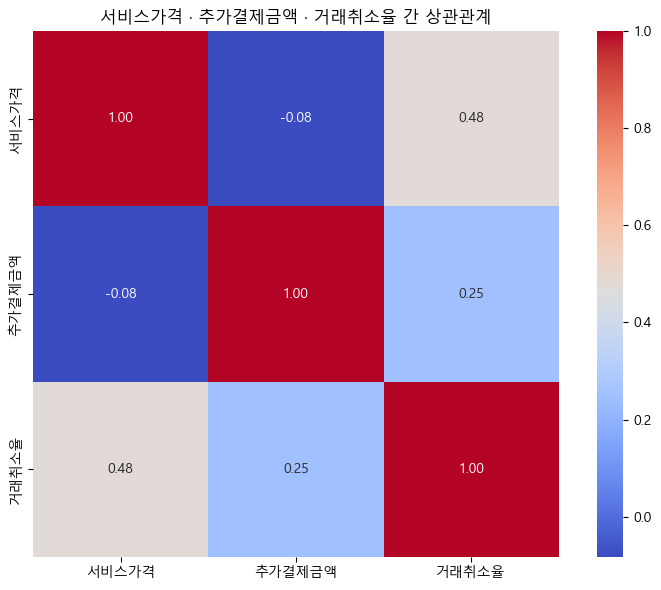

In [17]:
import seaborn as sns
corr = df_grouped[['서비스가격', '추가결제금액', '거래취소율']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True)
plt.title('서비스가격 · 추가결제금액 · 거래취소율 간 상관관계')
plt.tight_layout()
plt.show()

In [18]:
from scipy.stats import pearsonr  # 꼭 먼저 실행!

variables = ['서비스가격', '추가결제금액']
for var in variables:
    corr, p = pearsonr(df_grouped[var], df_grouped['거래취소율'])
    print(f"{var} ↔ 거래취소율 | 상관계수: {corr:.3f} | p-value: {p:.5f}")

서비스가격 ↔ 거래취소율 | 상관계수: 0.476 | p-value: 0.11736
추가결제금액 ↔ 거래취소율 | 상관계수: 0.248 | p-value: 0.43659


서비스 가격 , 추가 결제금액 발생여부=> 거래취소율에 영향 

In [37]:
df_selected = df1[['서비스가격', '서비스번호', '거래취소여부']]

df_grouped = df_selected.groupby('서비스번호').agg(
    취소된_거래수=('거래취소여부', lambda x: (x == 1).sum()),  # 거래취소여부가 1인 취소된 거래 수
    전체_거래수=('거래취소여부', 'count')                    # 서비스명별 전체 거래 수
).reset_index()

# 거래취소율 계산
df_grouped['거래취소율'] = (df_grouped['취소된_거래수'] / df_grouped['전체_거래수']) * 100

# 서비스명별 가격은 첫 번째 값만 가져오기 (서비스번호별 가격은 동일하므로 첫 번째 값만 사용)
df_grouped['서비스가격'] = df.groupby('서비스번호')['서비스가격'].first().values

df_3 = df_grouped[['서비스가격', '서비스번호', '거래취소율']]

df_3

,서비스가격,서비스번호,거래취소율
0,5000,2102,1.256281
1,10000,2103,2.434337
2,50000,2105,2.083333
3,5000,2106,3.589744
4,5000,2107,1.207938
...,...,...,...
2857,850000,6488,0.000000
2858,550000,6489,0.000000
2859,380000,6494,0.000000
2860,33000,6495,0.000000


In [38]:
df2 = df1[['서비스번호','추가결제금액발생여부']]

In [39]:
df_4 = pd.merge(df_3,df2,on='서비스번호')

In [40]:
df_4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335782 entries, 0 to 335781
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   서비스가격       335782 non-null  int64   
 1   서비스번호       335782 non-null  int64   
 2   거래취소율       335782 non-null  float64 
 3   추가결제금액발생여부  335782 non-null  category
dtypes: category(1), float64(1), int64(2)
memory usage: 8.0 MB


In [41]:
df_5 = df_4.copy()
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df_5['추가결제금액발생여부'] = label_encoder.fit_transform(df_5['추가결제금액발생여부'])

In [43]:
from scipy.stats import pearsonr

variables = ['서비스가격', '추가결제금액발생여부']
for var in variables:
    corr, p = pearsonr(df_5[var], df_5['거래취소율'])
    print(f"{var} ↔ 거래취소율 | 상관계수: {corr:.3f} | p-value: {p:.5f}")

서비스가격 ↔ 거래취소율 | 상관계수: 0.001 | p-value: 0.45541
추가결제금액발생여부 ↔ 거래취소율 | 상관계수: -0.012 | p-value: 0.00000


In [50]:
from scipy import stats

# 추가결제금액발생여부가 0인 그룹과 1인 그룹의 거래취소율 데이터 추출
group_0 = df_5[df_5['추가결제금액발생여부'] == 0]['거래취소율']
group_1 = df_5[df_5['추가결제금액발생여부'] == 1]['거래취소율']

# 독립표본 t-검정 수행
t_stat, p_value = stats.ttest_ind(group_0, group_1, equal_var=False)  # 등분산 가정 X

# 결과 출력
print(f"t-통계량: {t_stat:.4f}, p-값: {p_value:.4f}")

# 해석
if p_value < 0.05:
    print("추가결제금액발생여부에 따른 거래취소율 차이가 통계적으로 유의미함.")
else:
    print("추가결제금액발생여부에 따른 거래취소율 차이가 통계적으로 유의미하지 않음.")


t-통계량: 6.7684, p-값: 0.0000
추가결제금액발생여부에 따른 거래취소율 차이가 통계적으로 유의미함.
